In [696]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2lab
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np


In [796]:
def abstract(i):  
    
    # construct the argument parser and parse the arguments
    # ap = argparse.ArgumentParser()
    # ap.add_argument("-i", "--image", required = True, help = "Path to the image")
    # args = vars(ap.parse_args())

    # load the image and convert it to a floating point data type
    #image = cv2.imread('flower.jpg')
    image=i
    image_norm=img_as_float(image)
    lab = rgb2lab(image_norm)
    lab_norm=(lab + np.array([0, 128, 128])) / np.array([100, 255, 255])
    #image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
    # loop over the number of segments
    segments = slic(image_norm, n_segments = 600, compactness=15, sigma = 1,multichannel=True, convert2lab=True)

    # show the output of SLIC

    plt.imshow(mark_boundaries(image_rgb, segments))
    plt.savefig('segment.jpg')
    plt.show()
    n_segments = segments.max() + 1

    # construct position matrix
    max_y, max_x = np.array(segments.shape) - 1
    x = np.linspace(0, max_x, image.shape[1]) / max_x
    y = np.linspace(0, max_y, image.shape[0]) / max_y
    position = np.dstack((np.meshgrid(x, y)))

    # mean_lab = np.zeros((n_segments, 3))
    # mean_rgb = np.zeros((n_segments, 3))
    # mean_position = np.zeros((n_segments, 2))
    # for superpixel in np.unique(superpixels):
    #     mask = superpixels == superpixel
    #     mean_lab[superpixel, :] = nlab[mask, :].mean(axis=0)
    #     mean_rgb[superpixel, :] = nrgb[mask, :].mean(axis=0)
    #     mean_position[superpixel, :] = position[mask, :].mean(axis=0)
    mean_colors = np.zeros((n_segments, 3))
    mean_position = np.zeros((n_segments, 2))
    clrs=np.zeros((n_segments, 3))
    for i in np.unique(segments):
        mask = segments == i
        mean_colors[i,:]=lab[mask,:].mean(axis=0)
        mean_position[i, :] = position[mask, :].mean(axis=0)

    mean_position
    mean_colors
    d_abstract={}
#     for j in range (mean_position.shape[0]):
#         d_abstract[j]=[]

#     for k in range (mean_position.shape[0]):

#         d_abstract[k].append([[mean_position[i]],[mean_colors[i]]])

    d={}
    d1={}
    d_abst={}
    d_uniqueness={}
    r,c=segments.shape
    for i in range (r):
        for j in range (c):
            d[segments[i,j]]=[]
            d_uniqueness[segments[i,j]]=[]
            d1[segments[i,j]]=[]


    for i in range (r):
        for j in range (c):
            d[segments[i,j]].append([i,j])
            d1[segments[i,j]].append(image_norm[i,j])

    image_copy=np.copy(image_norm)
    
    for i in range (r):
        for j in range (c):
            image_copy[i,j]= np.median(d1[segments[i,j]],axis=0)
            d_uniqueness[segments[i,j]].append([image_copy[i,j]])
            
            
    output=(image_copy*255).astype('uint8')
    for i in d_uniqueness.keys():
        
        clrs[i]=d_uniqueness[i][0][0]

    
    return clrs,mean_position,segments,d,output,d_uniqueness

    
    
    


In [303]:
# d={}
# d_abst={}
# d_uniqueness={}
# r,c=segments.shape
# for i in range (r):
#     for j in range (c):
#         d[segments[i,j]]=[]
#         d_uniqueness[segments[i,j]]=[]
#         d_abst[segments[i,j]]=[]
        

# for i in range (r):
#     for j in range (c):
#         d[segments[i,j]].append([i,j])
        
# len(d)

416

In [124]:
# import numpy as np
#image_copy=np.copy(image_norm)
# for i in range (r):
#     for j in range (c):
#         image_copy[i,j]= np.median(d[segments[i,j]],axis=0)
#         d_uniqueness[segments[i,j]].append([[i,j] ,[image_copy[i,j]]])
# cv2.imwrite('image_copy.jpg',(image_copy * 255).astype('uint8'))


C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[s

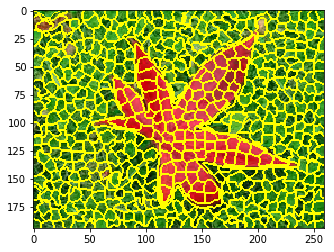

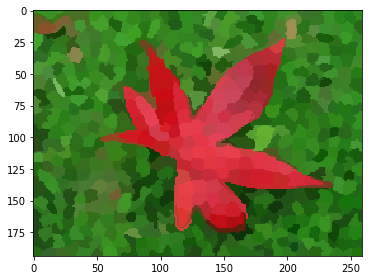

In [835]:
from skimage import io
image=io.imread('flower.jpg')
image_uniqueness=np.zeros((image_norm.shape[0],image_norm.shape[1],3))
image_distribution=np.zeros((image_norm.shape[0],image_norm.shape[1],3))

colors=[]
positions=[]
colors,positions,seg,d_p,o,d_u = abstract(image)
io.imshow(o)
io.show()
#d_u


In [832]:

sigmap = 1
sigmac = 30


def giveSSD(x1,x2):
    return np.sqrt(np.sum(np.square(x1-x2)))

def wp(pi,pj):
    Zi = 1 #change this
    return (1/Zi)*np.exp((-1/2*(sigmap**2))*np.square(giveSSD(pi,pj)))

def wc(ci,cj):
    Zi = 18
    #change this
    return (1/Zi)*np.exp((-1/2*(sigmac**2))*np.square(giveSSD(ci,cj)))

def uniquenessAssignment(c,p):
    U = np.empty(len(c))
    for i in range(len(c)):
        pi = p[i]
        ci = c[i]
        tUniq = 0;
        for j in range(len(c)):
            #if i != j:
            pj = p[j] 
            cj = c[j]
            tUniq += np.square(giveSSD(ci,cj))*wp(pi,pj)

        U[i] = tUniq
    
    return U

def distributionAssignment(c,p):
    D = np.zeros(len(c))
    for i in range(len(c)):
        
        ci = c[i]
        pi = p[i]
        
        meani = 0
        for j in range(len(c)):
            cj = c[j]
            pj = p[j]
            #if (i != j):
            meani += wc(ci,cj)*pj
        
        tDist = 0
        for j in range(len(c)):
            cj = c[j]
            pj = p[j]
            #if( i != j):
            tDist += np.square(giveSSD(pj,meani))*wc(ci,cj)
            
        D[i] = tDist
        
    return D


In [800]:
Uniqueness=uniquenessAssignment(colors,positions)
Uniqueness.shape

(567,)

In [833]:
dist=distributionAssignment(colors,positions)
dist.shape


(567,)

C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


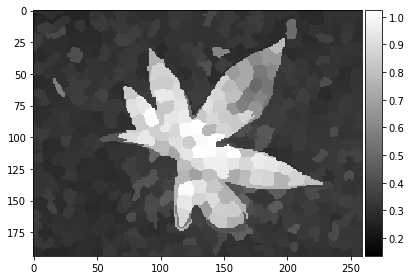

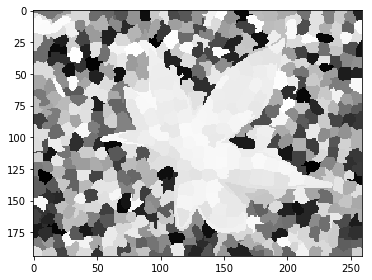

True

In [839]:
im_test=[]

for i in range(len(d_p)):
    for k in range(len(d_p[i])):
        
        row=d_p[i][k][0]
        col=d_p[i][k][1]
        image_uniqueness[row,col]=Uniqueness[i]
        image_distribution[row,col]=dist[i]
io.imshow(image_uniqueness/255,cmap='gray')
io.show()
io.imshow(255-np.uint8(image_distribution*255))
io.show()
cv2.imwrite('dis.jpg',image_distribution)

In [734]:
wp(colors[0],colors[1])

0.995546279539062

In [840]:
dist

array([1.25834020e+01, 4.39278882e+00, 1.53502510e-01, 4.59379697e+00,
       3.37216640e+01, 2.69012465e+00, 2.55267694e+01, 5.31517690e+01,
       3.53561449e+01, 5.33127467e+01, 1.77787745e+01, 7.68900610e+00,
       3.45577145e+01, 4.96334939e-02, 2.61082459e+01, 4.38546166e-01,
       1.10052620e+01, 2.65813694e-01, 3.34079975e+01, 6.36352076e+00,
       2.55865085e+00, 2.32066016e+01, 9.52549355e+00, 1.42670171e+01,
       1.45240666e+01, 1.29130456e+01, 1.09319581e-01, 1.28065471e-01,
       1.35627139e-02, 3.09394485e-01, 9.04135224e+00, 1.74294727e-02,
       1.14980782e+01, 1.43159185e-01, 5.19197186e+01, 3.54244789e-01,
       7.40490484e+00, 2.38413894e+01, 2.52177601e-01, 3.10323515e-02,
       5.79199696e+01, 4.72080324e-01, 4.85415253e+00, 3.89309616e+01,
       3.81685003e+01, 1.89972635e-02, 5.92276505e-02, 3.25751182e+01,
       2.84306882e+01, 3.80862250e-01, 1.94265161e+01, 3.23905711e+01,
       6.34028386e+00, 2.52639325e+01, 3.63071970e+00, 4.40887921e+00,
      